In [1838]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1839]:
df = pd.read_csv("data.csv")

<Axes: xlabel='Indeks', ylabel='Close'>

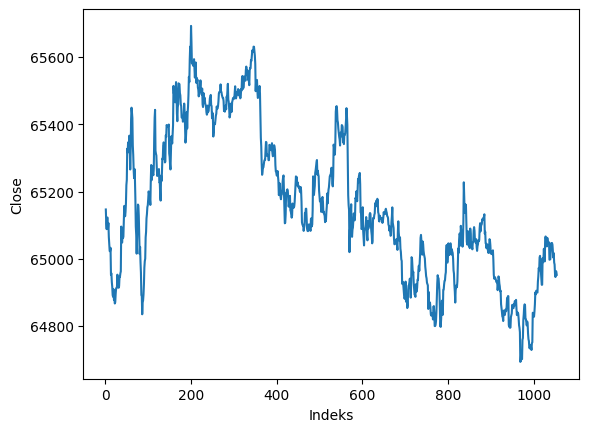

In [1840]:
sns.lineplot(data=df, x="Indeks", y="Close")

In [1841]:
# Log dönüşümü
df['log_close'] = np.log(df['Close'])

In [1842]:
# Kaydırma ve çıkarma
df['shifted'] = df['Close'].shift(1)
df['diff_shifted'] = df['Close'] - df['shifted']

df = df.dropna()

In [1843]:
from statsmodels.tsa.stattools import adfuller

# Dickey-Fuller testi
result = adfuller(df['diff_shifted'])
print('ADF Test Statistic:', result[0]) #Test istatistiği değeri. Bu değerin negatif olması, serinin durağan olma olasılığının yüksek olduğunu gösterir.
print('p-value:', result[1]) #hipotezin reddedilip reddedilemeyeceğini belirler. p < 0.05 ise, hipotez reddedilir ve seri durağandır.

ADF Test Statistic: -28.30543719229042
p-value: 0.0


In [1844]:
df

,Datetime,Indeks,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,log_close,shifted,diff_shifted
1,2024-06-19 00:02:00+00:00,2,65104.867188,65104.867188,65104.867188,65104.867188,65104.867188,0,0.0,0.0,11.083755,65146.660156,-41.792969
2,2024-06-19 00:03:00+00:00,3,65088.117188,65088.117188,65088.117188,65088.117188,65088.117188,0,0.0,0.0,11.083497,65104.867188,-16.750000
3,2024-06-19 00:05:00+00:00,4,65122.582031,65122.582031,65122.582031,65122.582031,65122.582031,1351680,0.0,0.0,11.084027,65088.117188,34.464844
4,2024-06-19 00:06:00+00:00,5,65122.582031,65122.582031,65122.582031,65122.582031,65122.582031,0,0.0,0.0,11.084027,65122.582031,0.000000
5,2024-06-19 00:08:00+00:00,6,65089.078125,65089.078125,65089.078125,65089.078125,65089.078125,0,0.0,0.0,11.083512,65122.582031,-33.503906
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,2024-06-19 22:06:00+00:00,1050,64954.628906,64954.628906,64954.628906,64954.628906,64954.628906,0,0.0,0.0,11.081444,64982.906250,-28.277344
1050,2024-06-19 22:08:00+00:00,1051,64945.812500,64945.812500,64945.812500,64945.812500,64945.812500,0,0.0,0.0,11.081309,64954.628906,-8.816406
1051,2024-06-19 22:09:00+00:00,1052,64963.574219,64963.574219,64963.574219,64963.574219,64963.574219,0,0.0,0.0,11.081582,64945.812500,17.761719
1052,2024-06-19 22:11:00+00:00,1053,64961.746094,64961.746094,64961.746094,64961.746094,64961.746094,0,0.0,0.0,11.081554,64963.574219,-1.828125


<Axes: xlabel='Indeks', ylabel='diff_shifted'>

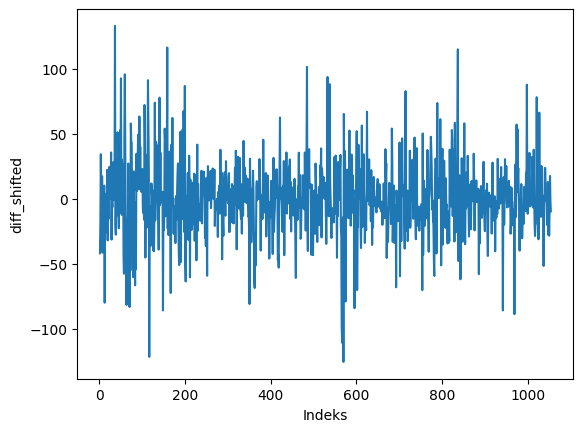

In [1845]:
sns.lineplot(data=df, x="Indeks", y="diff_shifted")

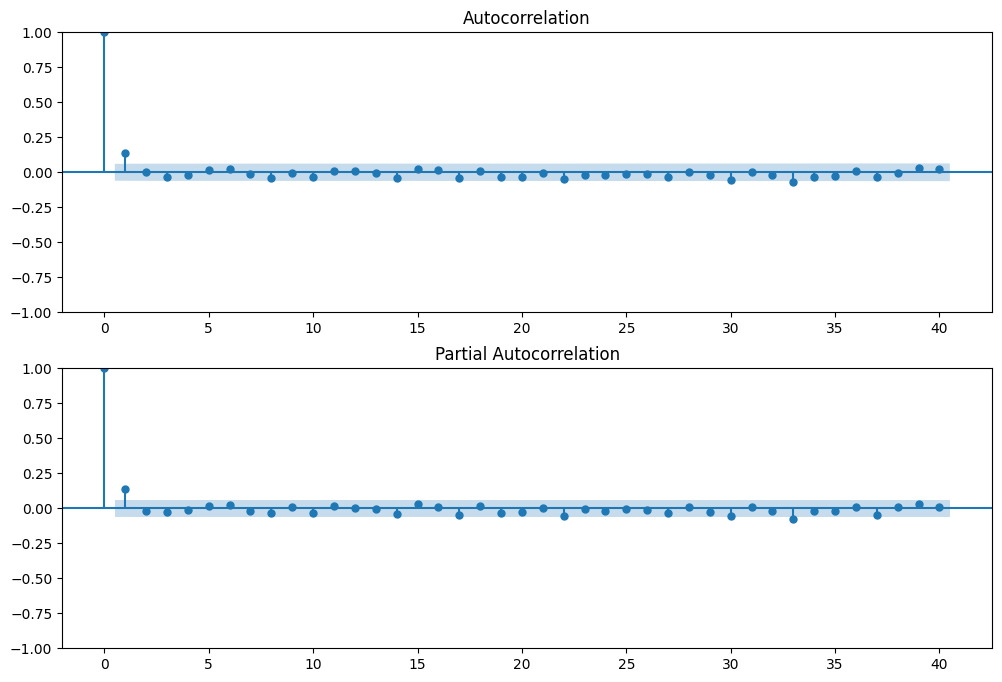

In [1846]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df["diff_shifted"].values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df["diff_shifted"], lags=40, ax=ax2)


In [1847]:
from statsmodels.tsa.arima.model import ARIMA
arma_mod21 = ARIMA(df["Close"], order=(1, 1, 1)).fit()
arma_mod21.summary()


c:\ProgramData\anaconda3\envs\neuralNetwork\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\envs\neuralNetwork\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\envs\neuralNetwork\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1053
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4988.162
Date:                Thu, 20 Jun 2024   AIC                           9982.325
Time:                        01:15:41   BIC                           9997.200
Sample:                             0   HQIC                          9987.965
                               - 1053                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0595      0.210      0.283      0.777      -0.352       0.471
ma.L1          0.0754      0.212      0.355      0.723      -0.341       0.492
sigma2       769.0889     22.414     34.313      0.000     725.158     813.019
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               296.14
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.63   Skew:                             0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [1848]:
watson = sm.stats.durbin_watson(arma_mod21.resid.values) #deger<2 Pozitif otokorelasyon / deger=2 otokorelasyon yok / deger>2 Negatif otokorelasyon
jungbox = sm.stats.acorr_ljungbox(df["Close"], lags=[10], return_df=True) #pdegeri<0.05 varsa akgürültü yoktur. otokorelasyon vardır.
print(watson,"\n", jungbox)

1.0009136547384185 
         lb_stat  lb_pvalue
10  9500.068806        0.0


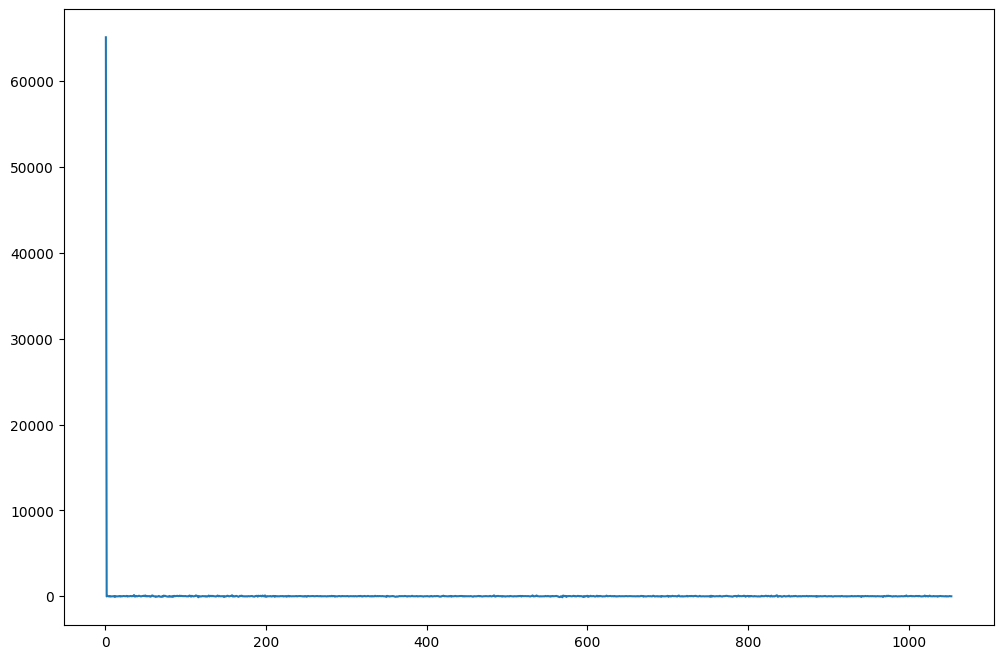

In [1849]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax = arma_mod21.resid.plot(ax=ax)


In [1850]:
from scipy import stats
resid = arma_mod21.resid
stats.normaltest(resid)


NormaltestResult(statistic=2907.446078150171, pvalue=0.0)

In [1851]:
predict_sunspots = arma_mod21.predict(start=1100, end=1500, dynamic=True)
print(predict_sunspots)

1100    64950.949396
1101    64950.949396
1102    64950.949396
1103    64950.949396
1104    64950.949396
            ...     
1496    64950.949396
1497    64950.949396
1498    64950.949396
1499    64950.949396
1500    64950.949396
Name: predicted_mean, Length: 401, dtype: float64


c:\ProgramData\anaconda3\envs\neuralNetwork\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\ProgramData\anaconda3\envs\neuralNetwork\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\ProgramData\anaconda3\envs\neuralNetwork\Lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
